In [ ]:
!pip install geopandas matplotlib pandas pandas-ods-reader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49000 sha256=8983967d33b857c493bd3abf0884298f823e60eec70a333b8228896474f3d761
  Stored in directory: /root/.cache/pip/wheels/50/09/62/ea2c44e6ffdd067d6c8d3f557af0734a195bd252d6901f23ca
Successfully built ezodf


In [ ]:
import geopandas as gpd
import pandas as pd
import pandas_ods_reader as pdr
import matplotlib.pyplot as plt

In [82]:
data = pdr.read_ods('/content/Tipologia_muni_urbano.ods')
dicionario = pdr.read_ods('/content/Tipologia_muni_urbano.ods', sheet='Dicionário')
tipologia = pdr.read_ods('/content/Tipologia_muni_urbano.ods' , sheet='Tipologia')

In [85]:
dicionario

,Dicionário,unnamed.1
0,Coluna,Significado
1,NM_UF,Nome da Unidade da Federação
2,SIG_UF,Sigla da Unidade da Federação
3,CD_GCMUN,Geocódigo do Município
4,NM_MUN,Nome do Município
5,TIPO,Tipologia municipal rural-urbano


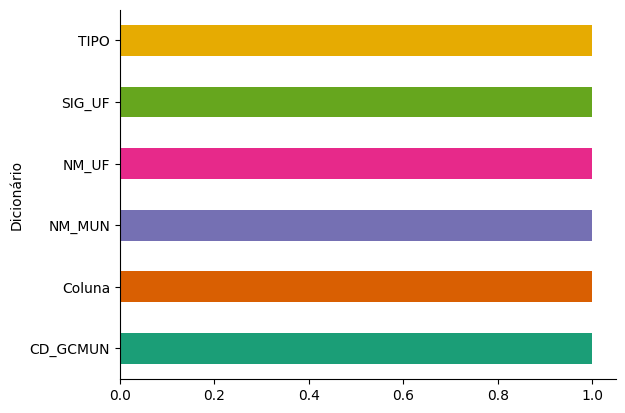

In [86]:
# @title Dicionário

from matplotlib import pyplot as plt
import seaborn as sns
dicionario.groupby('Dicionário').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [87]:
tipologia

,NM_UF,SIG_UF,CD_GCMUN,NM_MUN,TIPO
0,Rondônia,RO,1100015.0,Alta Floresta D´Oeste,IntermediarioAdjacente
1,Rondônia,RO,1100023.0,Ariquemes,Urbano
2,Rondônia,RO,1100031.0,Cabixi,RuralAdjacente
3,Rondônia,RO,1100049.0,Cacoal,Urbano
4,Rondônia,RO,1100056.0,Cerejeiras,Urbano
...,...,...,...,...,...
5560,Goiás,GO,5222005.0,Vianópolis,RuralAdjacente
5561,Goiás,GO,5222054.0,Vicentinópolis,IntermediarioAdjacente
5562,Goiás,GO,5222203.0,Vila Boa,RuralAdjacente
5563,Goiás,GO,5222302.0,Vila Propício,RuralAdjacente


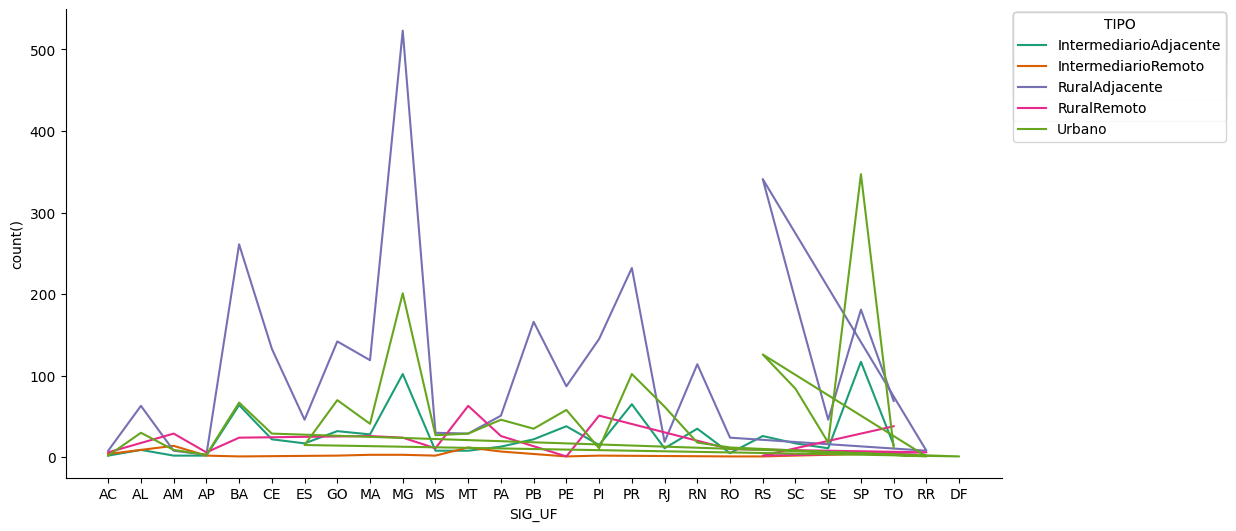

In [94]:
# @title CD_GCMUN vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SIG_UF']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SIG_UF'}, axis=1)
              .sort_values('SIG_UF', ascending=True))
  xs = counted['SIG_UF']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tipologia.sort_values('SIG_UF', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TIPO')):
  _plot_series(series, series_name, i)
  fig.legend(title='TIPO', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SIG_UF')
_ = plt.ylabel('count()')